In [3]:
!kaggle datasets download -d riccardolagrassa/lu3m6tgt

Dataset URL: https://www.kaggle.com/datasets/riccardolagrassa/lu3m6tgt
License(s): CC-BY-SA-4.0
 99%|██████████████████████████████████████▋| 1.10G/1.11G [00:07<00:00, 175MB/s]
100%|███████████████████████████████████████| 1.11G/1.11G [00:07<00:00, 158MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile("lu3m6tgt.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ultralytics import YOLO

!yolo task=detect mode=train model=yolov8l.pt data=/teamspace/studios/this_studio/LU3M6TGT_yolo_format/data.yaml epochs=150 imgsz=640

Ultralytics YOLOv8.2.85 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/teamspace/studios/this_studio/LU3M6TGT_yolo_format/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [ ]:
from ultralytics import YOLO

!yolo task=detect mode=train model=runs/detect/train5/weights/last.pt data=/teamspace/studios/this_studio/LU3M6TGT_yolo_format/data.yaml epochs=50 imgsz=640 resume=True

Ultralytics YOLOv8.2.85 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train5/weights/last.pt, data=/teamspace/studios/this_studio/LU3M6TGT_yolo_format/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/detect/train5/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

In [ ]:
from ultralytics import YOLO

!yolo task=detect mode=train model=runs/detect/train5/weights/last.pt data=/teamspace/studios/this_studio/LU3M6TGT_yolo_format/data.yaml epochs=50 imgsz=640 resume=True

Ultralytics YOLOv8.2.85 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train5/weights/last.pt, data=/teamspace/studios/this_studio/LU3M6TGT_yolo_format/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/detect/train5/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

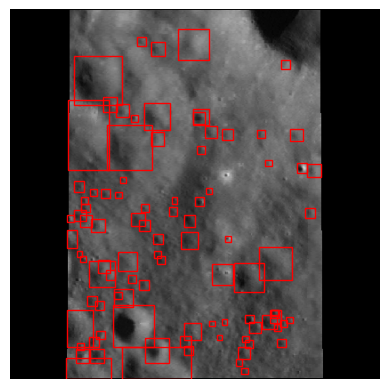

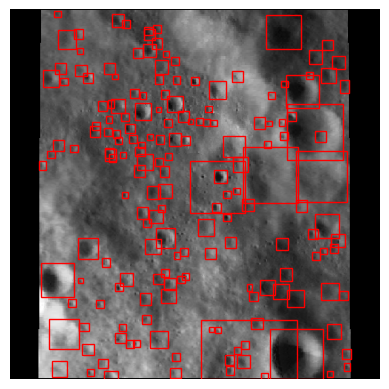

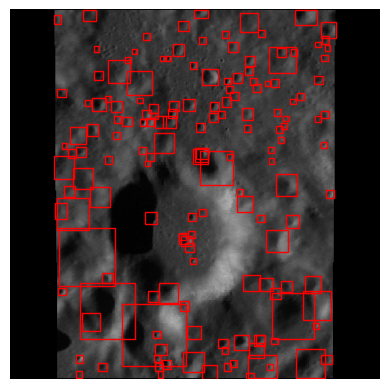

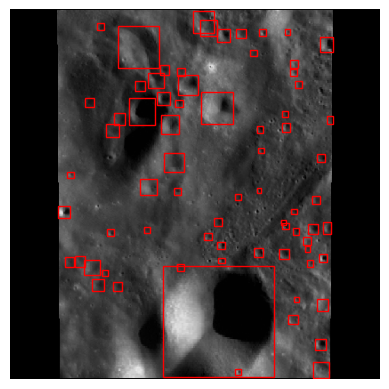

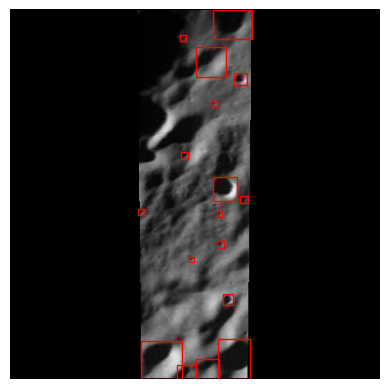

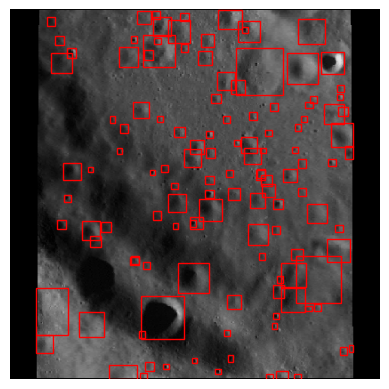

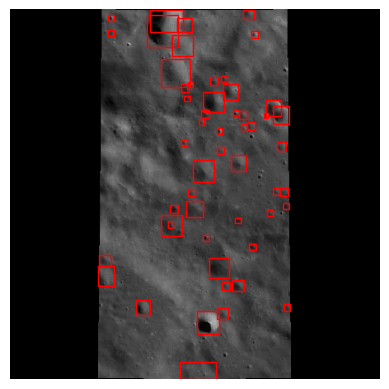

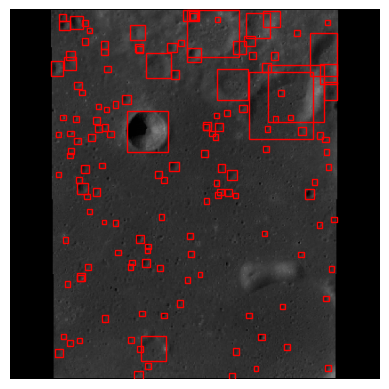

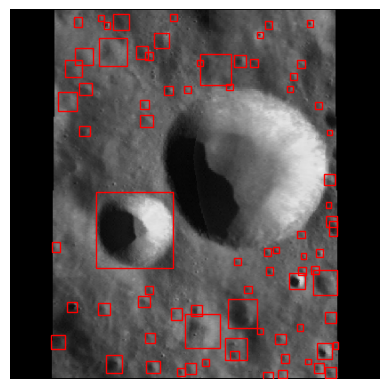

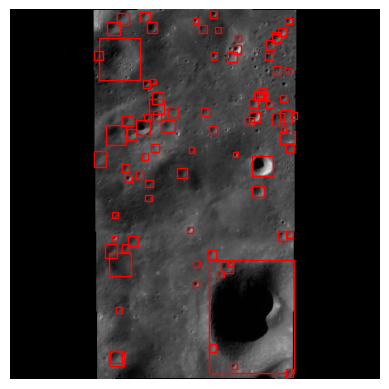

In [3]:
import cv2
import random
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def parse_labels_from_file(file_path):
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            label_parts = line.strip().split()
            if len(label_parts) == 5:
                class_id, x, y, w, h = map(float, label_parts)
                labels.append((int(class_id), x, y, w, h))
    return labels


def yolo_to_pixels(image_width, image_height, box):
    x, y, w, h = box
    xmin = int((x - w / 2) * image_width)
    xmax = int((x + w / 2) * image_width)
    ymin = int((y - h / 2) * image_height)
    ymax = int((y + h / 2) * image_height)
    return xmin, ymin, xmax, ymax

def display_image_with_labels(image_path, labels,i):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_height, image_width, _ = image.shape

    fig, ax = plt.subplots(1)
    ax.imshow(image_rgb)

    for label in labels:
        class_id, x, y, w, h = label

        xmin, ymin, xmax, ymax = yolo_to_pixels(image_width, image_height, (x, y, w, h))

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        ax.add_patch(rect)

        ax.text(xmin, ymin - 10, f'', fontsize=10, color='r')

    plt.savefig('crater'+str(i))
    plt.axis('off')
    plt.show()


for j in range(10):
    img_path = 'C:/Users/ASUS/Desktop/LU3M6TGT_yolo_format/valid/images/'
    random_img = random.choice(os.listdir(img_path))

    final_path_img = img_path + random_img

    labels_file_path = 'C:/Users/ASUS/Desktop/LU3M6TGT_yolo_format/valid/labels/'+random_img.rsplit('.',1)[0]+'.txt'
    labels = parse_labels_from_file(labels_file_path)


    display_image_with_labels(final_path_img, labels,j)